### For this Midterm exam we will be coding a little 2-D kinematics/projectile motion problem solver. Ours will be a simplified program which doesn't take into account air resistance, centrifugal, or Coriolis forces. We will build the problem in stages but a lot of the points require your first stages to run correctly.
Problems to Hand In: Your log is part of your Midterm exam. In one of the entries, it should identify the start and end of the Midterm and list the problem numbers in order. Keep notes about what you are doing for each problem, as well as the answers to the problems.

#### Part A. (30 pts) Create a function that considers the case of ZERO acceleration (constant velocity motion) in the $x$-direction and takes in 2 of the 3 kinematic variables: $\Delta x$, $v_x$,  and $t$ and calculates the remaining variable. Make sure to include an informative doc string and to test and account for errors based on the range of possible user inputs. Hint: You will need to use If/Else statements.

In [29]:
print( 'Part/problem letter A:' )

# deltax = vx * t
def solve_missing_kinematic(deltax: float = None, vx: float = None, t: float = None) -> float:
    """Returns the missing kinematic variable given the other two variables from these three: deltax, vx, t"""
    if deltax == None:
        return vx * t
    elif vx == None:
        if t == 0:
            raise ValueError( 'ERROR! t cannot be zero' )
        return deltax / t
    elif t == None:
        if vx == 0:
            raise ValueError( 'ERROR! vx cannot be zero' )
        return deltax / vx
    else:
        raise ValueError( 'ERROR! You must provide only two of these three variables: deltax, vx, t' )

Part/problem letter A:


#### Part B. (20 pts) Create a function, const_accel, that takes in the magnitude of a planet's constant acceleration due to gravity, $g$ and all but 2 of the 4 kinematic variables: $\Delta y$, $v_{0y}$, $v_{fy}$, and $t$. Your function should calculate the 2 kinematic variables which were not given from the quantities that are known. Neglect air resistance. Make sure to include an informative doc string and to test and account for errors based on the range of possible user inputs. You can find a list of the four kinematic equations for constant acceleration in any introductory physics book.###

In [30]:
print("Part/problem letter B:")

def const_accel(deltay: float = None, v0y: float = None, vfy: float = None, t: float = None, g: float = 9.81) -> dict:
    """Returns the two missing kinematic variables given two variables from these four: deltay, v0y, vfy, t"""

    calculated_deltay = None
    calculated_v0y = None
    calculated_vfy = None
    calculated_t = None

    try:
        if deltay == None:
            if vfy == None:
                calculated_deltay = (v0y * t) + (0.5 * g * t**2)
            elif v0y == None:
                calculated_deltay = (vfy * t) - (0.5 * g * t**2)
            elif t == None:
                calculated_deltay = ((vfy**2) - (v0y**2)) / (2 * g)
        if v0y == None:
            if vfy == None:
                calculated_v0y = (deltay - (0.5 * g * t**2)) / t
            elif deltay == None:
                calculated_v0y = (vfy * t) - (0.5 * g * t**2)
            elif t == None:
                calculated_v0y = (vfy**2 - (2 * g * deltay))**0.5
        if vfy == None:
            if deltay == None:
                calculated_vfy = (v0y + (g * t)) # AKA v = v0 + at
            elif v0y == None:
                calculated_vfy = (deltay - (0.5 * g * t**2)) / t
            elif t == None:
                calculated_vfy = (v0y**2 + (2 * g * deltay))**0.5
        if t == None:
            if deltay == None:
                calculated_t = (vfy - v0y) / g
            elif v0y == None:
                calculated_t = (vfy - (0.5 * g * t**2)) / deltay
            elif vfy == None:
                calculated_t = (deltay - (0.5 * g * t**2)) / v0y
    except TypeError:
        raise TypeError( 'ERROR! You must provide only two of these four variables: deltay, v0y, vfy, t' )

    calculated_dict = {}

    if calculated_deltay != None:
        calculated_dict["deltay"] = calculated_deltay
    if calculated_v0y != None:
        calculated_dict["v0y"] = calculated_v0y
    if calculated_vfy != None:
        calculated_dict["vfy"] = calculated_vfy
    if calculated_t != None:
        calculated_dict["t"] = calculated_t
    
    return calculated_dict




Part/problem letter B:


#### Part C. (10 pts) Write a function, kin_2D which calls one or both of the previous two functions and takes as input the (positive) magnitude of the acceleration due to gravity on a planet's surface, $g$, an initial position vector $\vec{r}_0 = (x_0,y_0)$ in m, a time $t$ in s, and the magnitude and angle (counterclockwise from the horizon or $+x$-axis) of the initial velocity $|\vec{v_0}|$ at angle $\theta$. The function should return the final position vector's $x$ and $y$ components in a 2 element array pos_f and the final velocity vector's x and y components in a 2 element array vel_f. 
Hint you must use trigonometry to break up the velocity vector into $x$ and $y$ components. 

In [31]:
print( 'Part/problem letter C:' )

import math

def kin_2D(r0: list, t: float, mag: float, angle: float, g: float = 9.81) -> list:
    """Returns the final position vector pos_f and final velocity vector vel_f of a projectile launched at an angle on a planet's surface given the initial position vector r0, time t, magnitude of the initial velocity mag, degrees angle of the initial velocity angle, and optionally the gravitational acceleration g (default is 9.81 m/s^2)"""
    # convert angle to radians
    angle = math.radians(angle)

    # calculate the x and y components of the initial velocity
    v0x = mag * math.cos(angle)
    v0y = mag * math.sin(angle)

    # set up x0 and y0
    x0 = r0[0]
    y0 = r0[1]

    # assumption: if the projectile hits x = 0 during the motion, then we can stop calculating

    time_to_reach_ground = (v0y + math.sqrt(v0y**2 + 2 * g * y0)) / g

    if time_to_reach_ground <= t:
        final_x = time_to_reach_ground * v0x + x0
        final_y = 0
        pos_f = [final_x, final_y]

        final_vx = 0
        final_vy = 0
        vel_f = [final_vx, final_vy]

        return [pos_f, vel_f]

    if time_to_reach_ground > t:
        # calculate the final x and y positions
        final_x = x0 + solve_missing_kinematic(vx = v0x, t = t)
        final_y = y0 + solve_missing_kinematic(vx = v0y, t = t) - (0.5 * g * t**2)
        pos_f = [final_x, final_y]

        # calculate the final x and y velocities
        final_vx = v0x
        final_vy = v0y - (g * t)
        vel_f = [final_vx, final_vy]

        return [pos_f, vel_f]

    
    

Part/problem letter C:


#### Part D. (10 points) Write a function make_plots, that takes in the same values as the previous problem but now also take in an array, $t$ of 1000 times at 0.2 s intervals. The function should create 4 publication ready, labeled figures:
- Figure 1: The height of the projectile as a function of time $y(t)$. 
- Figure 2: The magnitude of the velocity of the projectile $\vec{v}$ as a function of time. 
- Figure 3: The height ($y$) of the projectile as a function of the $x$-position of the projectile (trajectory).
- Figure 4: The angle $\theta$ in which the projectile is moving in as a function of the projectile's $x$-position. (take the angle to be positive in the counterclockwise direction from the $+x$-axis and use units of degrees). Hint: Using a FOR loop for this is fine.

In [32]:
print( 'Part/problem letter D:' )

import matplotlib.pyplot as plt
import numpy as np

def make_plots(r0: list, mag: float, angle: float, t_array: list, g: float = 9.81):
    """Create 4 matplotlib plots of the height of a projectile versus time, the velocity versus time, the height versus x, and the angle versus x given the initial position vector r0, magnitude of the initial velocity mag, angle of the initial velocity angle, time array t_array, and optionally the gravitational acceleration g (default is 9.81 m/s^2)"""
    height_list = []
    for t in t_array:
        height_list.append(kin_2D(r0, t, mag, angle, g)[0][1]) # access the y component of the position vector
    plt.figure()
    plt.plot(t_array, height_list)
    plt.title( 'Height vs. Time' )
    plt.xlabel( 'Time (s)' )
    plt.ylabel( 'Height (m)' )

    velocity_list = []
    for t in t_array:
        velocity_list.append(kin_2D(r0, t, mag, angle, g)[1][1]) # access the y component of the velocity vector
    plt.figure()
    plt.plot(t_array, velocity_list, label = "Velocity vs. Time")
    plt.title( 'Velocity vs. Time' )
    plt.xlabel( 'Time (s)' )
    plt.ylabel( 'Velocity (m/s)' )

    x_list = []
    for t in t_array:
        x_list.append(kin_2D(r0, t, mag, angle, g)[0][0]) # access the x component of the position vector
    plt.figure()
    plt.plot(x_list, height_list)
    plt.title( 'Height vs. Distance' )
    plt.xlabel( 'Distance (m)' )
    plt.ylabel( 'Height (m)' )

    angle_list = []
    for t in t_array:
        pos_f, vel_f = kin_2D(r0, t, mag, angle, g)
        if vel_f[0] == 0:
            this_angle = 90
        else:
            this_angle = math.degrees(math.atan(vel_f[1] / vel_f[0]))
        angle_list.append(this_angle)
    plt.figure()
    plt.plot(x_list, angle_list)
    plt.title( 'Angle vs. Distance' )
    plt.xlabel( 'Distance (m)')
    plt.ylabel( 'Angle (degrees)' )

Part/problem letter D:


#### Part E. (10 points) 
1. Call the function and produce figures 1 - 4 for a projectile launched from $x = 0$ m on top of a $5$ m hill on Mars  with an initial velociy of $2$ m/s at $30^\circ$ ABOVE the horizon.
2. Call the function and produce figures 1 - 4 for a projectile launched from $x = 0$ m on top of a $5$ m hill on Earth with an initial velociy of $7$ m/s at $30^\circ$ BELOW the horizon.
3. Call the function and produce figures 1 - 4 for a projectile launched from $x = 3.3$ m on top of a $10$ m hill on the Moon with an initial velociy of $70$ m/s at $10^\circ$ ABOVE the horizon.
4. Create a markdown cell and comment about if your results seem to make sense. ($\sim$ 3 - 4 sentences)

Part/problem letter E:


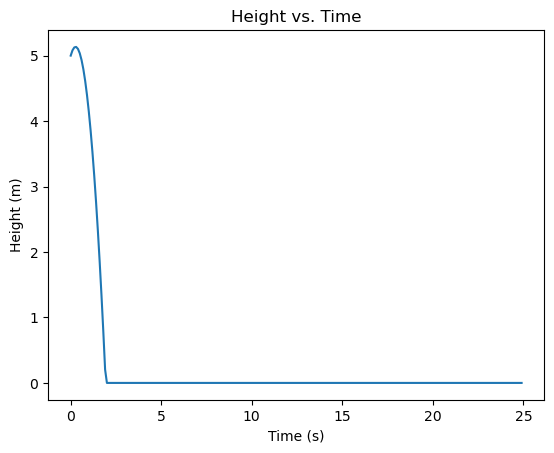

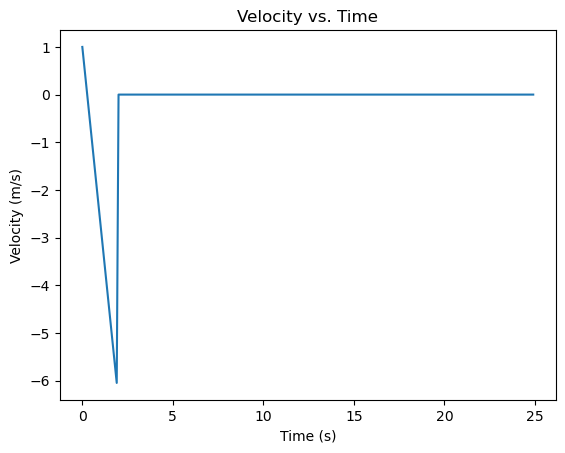

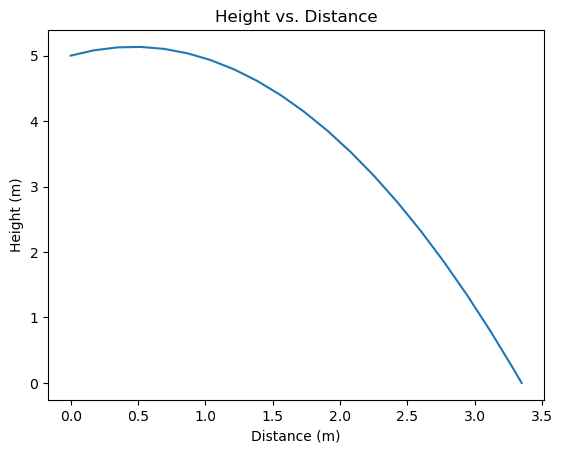

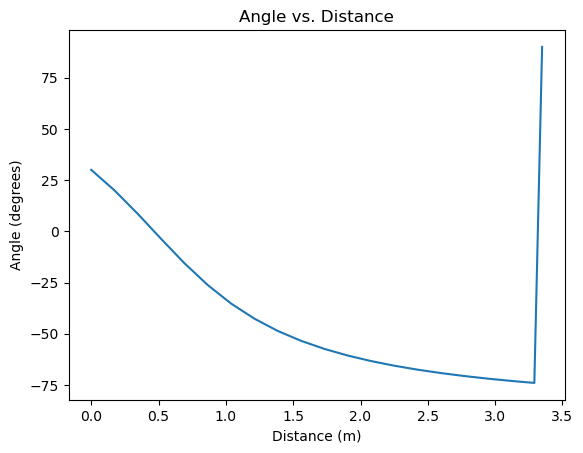

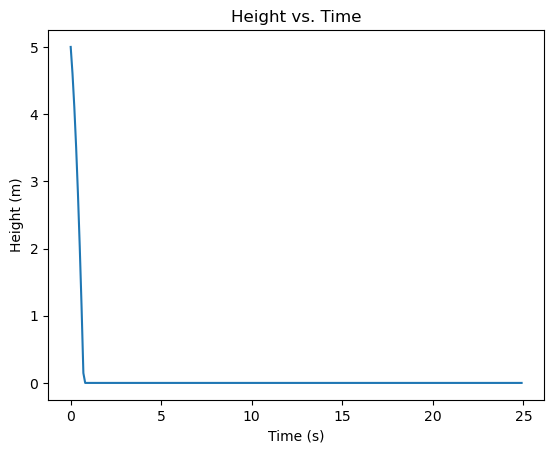

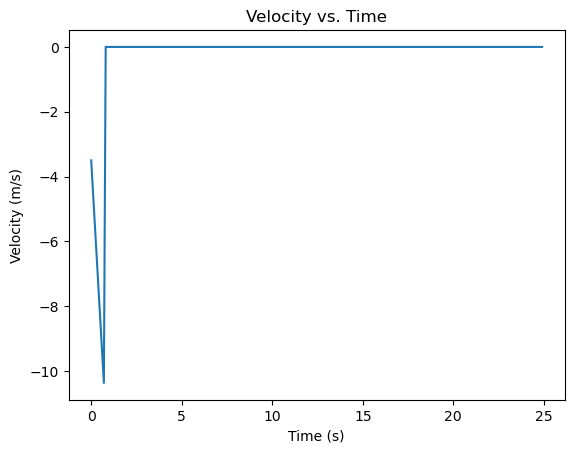

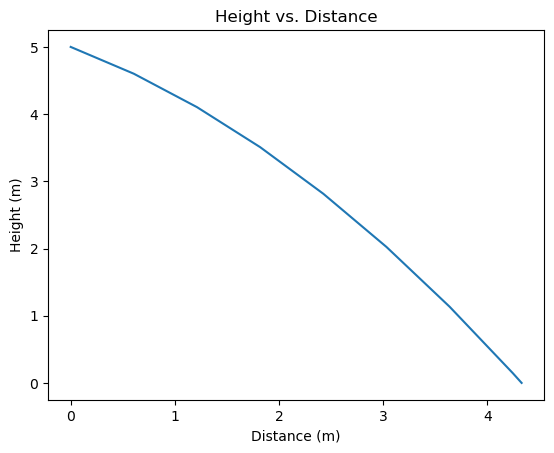

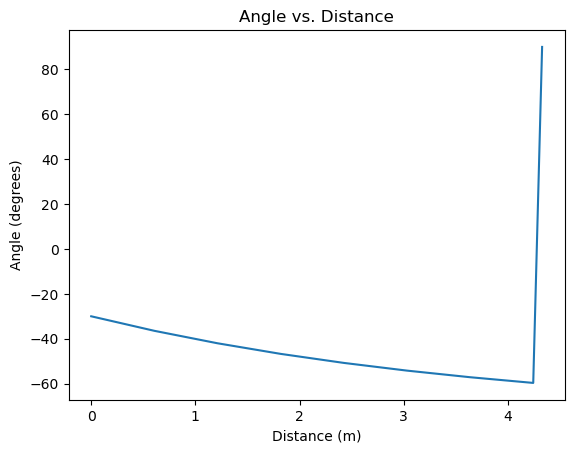

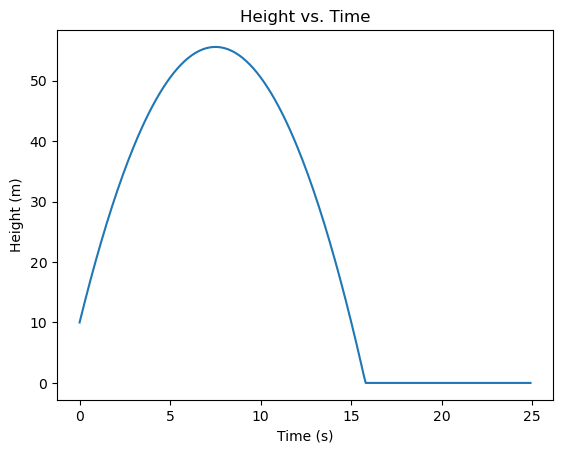

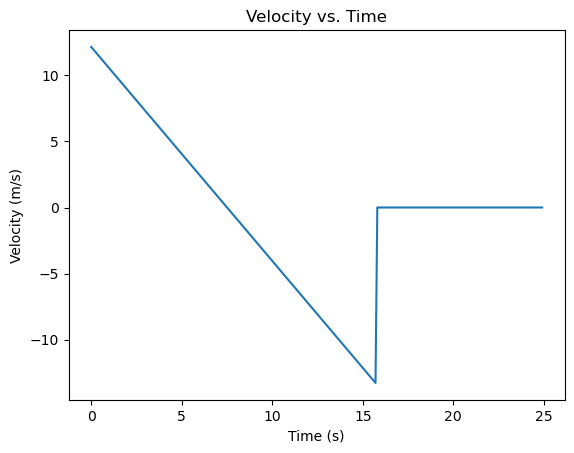

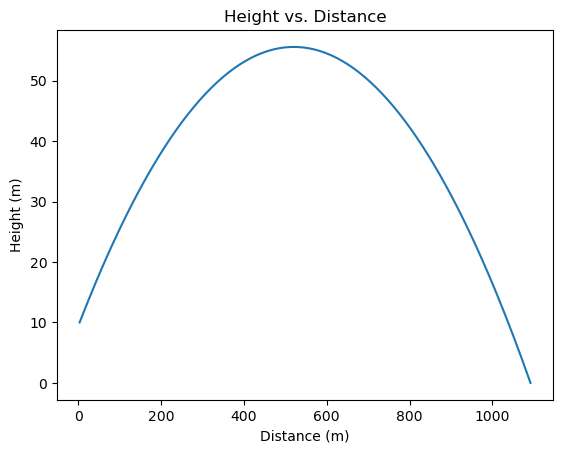

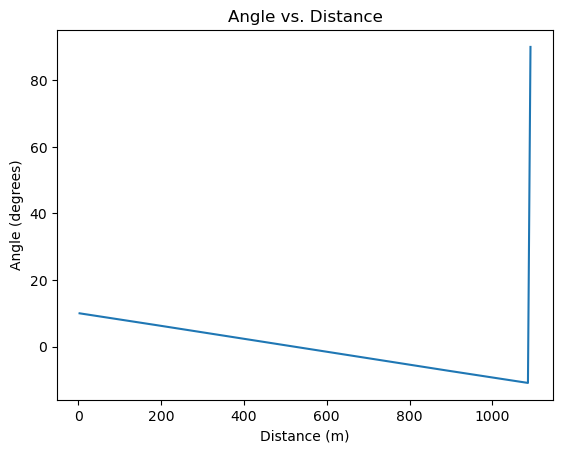

In [33]:
print( 'Part/problem letter E:' )

# make an array with 1000 members and 0.2 increments
projectile_times = np.arange(0, 25, 0.1)

make_plots([0, 5], 2, 30, projectile_times, 3.71)
make_plots([0, 5], 7, -30, projectile_times)
make_plots([3.3, 10], 70, 10, projectile_times, 1.62)

# Does this make sense?

I think these results make sense as they appear how you might imagine an object in these situations would behave. Additionally, the lines on the graphs make sense: the positional ones tend to have a smooth curve, the accelerational ones appear linear, and the angular ones corroborate the corresponding graphs of position and acceleration. Perhaps it would be clearer to see the trajectories if the time was shorter with more steps because right now, most of the "good stuff" happens to the very left of the curve.

#### Part F. (5 points) Make a plot of the total energy (Kinetic + Potential) of the projectile as a function of time for 1-3 in part E. Assume that the mass is 1 kg. Kinetic Energy is $\frac{1}{2}mv^2$ and potential energy is $mgy$. The three curves should be in one figure using different colors and labeled with a legend showing the planet they took place on.

Part/problem letter F:


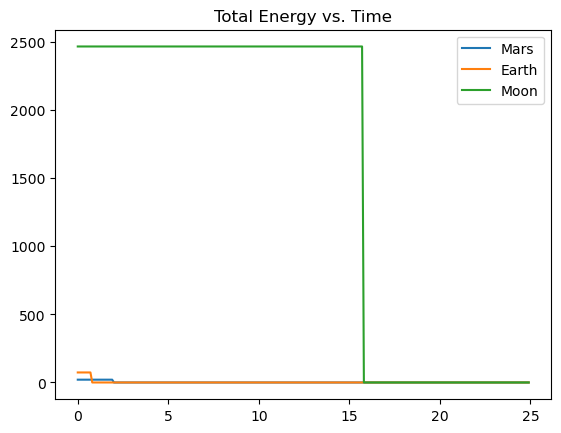

In [34]:
print( 'Part/problem letter F:' )

def total_energy(r0: list, mag: float, angle: float, t_array: list, g: float = 9.81):
    # assumption: mass = 1kg
    energy_list = []
    for t in t_array:
        pos_f, vel_f = kin_2D(r0, t, mag, angle, g)
        kinetic_energy = 0.5 * (vel_f[0]**2 + vel_f[1]**2) # E = 1/2mv^2
        potential_energy = g * pos_f[1] # E = mgh
        energy_list.append(kinetic_energy + potential_energy)
    return energy_list

plt.title("Total Energy vs. Time")
mars_energy = total_energy([0, 5], 2, 30, projectile_times, 3.71)
plt.plot(projectile_times, mars_energy, label = "Mars")
earth_energy = total_energy([0, 5], 7, -30, projectile_times)
plt.plot(projectile_times, earth_energy, label = "Earth")
moon_energy = total_energy([3.3, 10], 70, 10, projectile_times, 1.62)
plt.plot(projectile_times, moon_energy, label = "Moon")
plt.legend()

#### Part G. (5 points) Make a "wrapper" function, my_wrapper, that asks the user for the following input: 
- The planet on which the motion is taking place, i.e. "Earth", "Jupiter", "Mars", "Moon" etc. Your function should be able to "look up" $g$ for the selected planet.
- The initial position vector $\vec{r}_0 = (x_0,y_0)$ in m. (Make sure that $y_0$ is a positive number (the projectile should start above ground level.)
- The magnitude and angle (counterclockwise from the horizon or $+x$-axis) of the initial velocity $|\vec{v_0}|$ at angle $\theta$.

#### The wrapper function should call your functions from previous parts to tell the user how long it will take for the projectile to hit the ground and what its speed will be on impact.
#### The wrapper function should also create all of the plots in from part D.

Part/problem letter G:
Now making your plots!
The projectile hits the ground at 11.200000000000001 seconds. 
The projectile hits the ground with a speed of 17.82m/s.


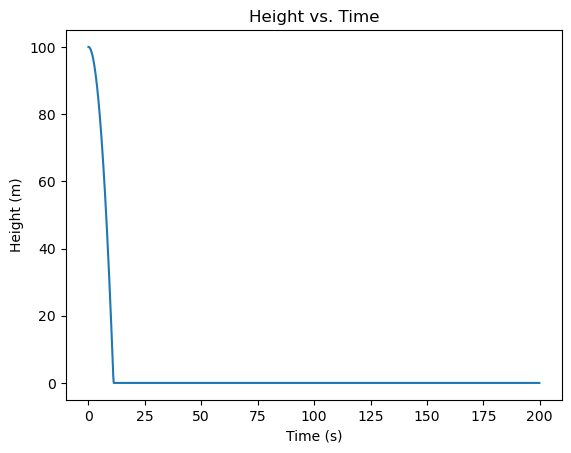

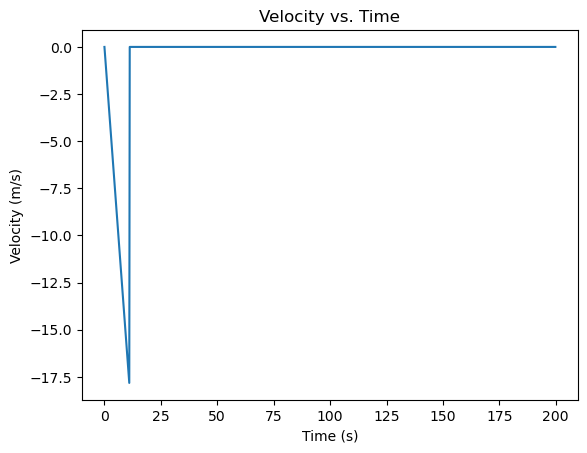

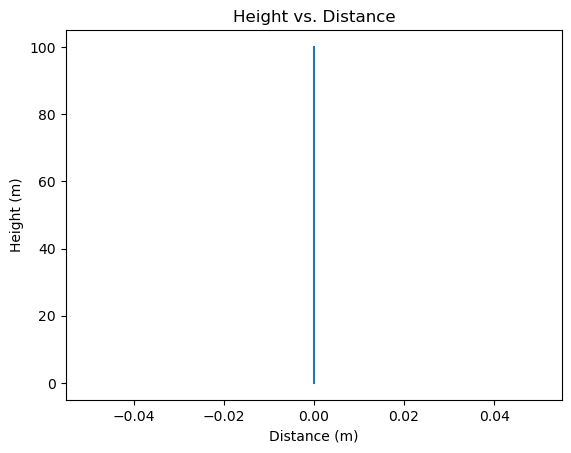

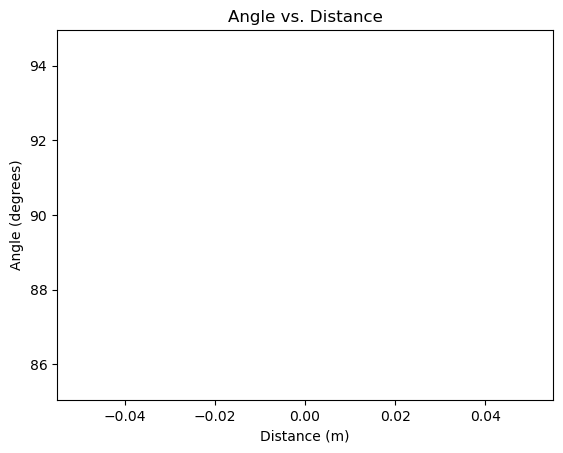

In [35]:
print( 'Part/problem letter G:' )

def my_wrapper():
    g = 0
    while g == 0:
        this_planet = input( 'Which planet would you like to use? (Earth, Jupiter, Mars, Moon, Mercury, Venus, or Saturn) ' )
        this_planet = this_planet.lower().strip()
        if this_planet == "earth":
            g = 9.81
        elif this_planet == "jupiter":
            g = 25.92
        elif this_planet == "mars":
            g = 3.71
        elif this_planet == "moon":
            g = 1.62
        elif this_planet == "mercury":
            g = 3.7
        elif this_planet == "venus":
            g = 8.87
        elif this_planet == "saturn":
            g = 11.08
        else:
            print( 'ERROR! Invalid planet. Please enter a real planet.' )

    r0 = []
    while len(r0) != 2:
        try:
            r0 = [float(input( 'Enter the x position: ' )), float(input( 'Enter the y position: ' ))]
            if r0[0] < 0 or r0[1] < 0:
                print( 'ERROR! Invalid position. Please enter a positive number.' )
                r0 = []
        except ValueError:
            print( 'ERROR! Invalid position. Please enter a real number.' )
    
    mag = None
    while mag == None:
        try:
            mag = float(input( 'Enter the magnitude of the initial velocity: ' ))
            if mag < 0:
                print( 'ERROR! Invalid magnitude. Please enter a positive number.' )
                mag = None
        except ValueError:
            print( 'ERROR! Invalid magnitude. Please enter a real number.' )

    angle = None
    while angle == None:
        try:
            angle = float(input( 'Enter the angle of the initial velocity in degrees: ' ))
            if angle < 0 or angle > 90:
                print( 'ERROR! Invalid angle. Please enter a number between 0 and 90.' )
                angle = None
        except ValueError:
            print( 'ERROR! Invalid angle. Please enter a real number.' )

    t_array = np.arange(0, 200, 0.2)

    print( 'Now making your plots!' )
    make_plots(r0, mag, angle, t_array, g)

    # now calculate when the projectile hits the ground
    calculated_data = []
    impact_index = 0
    for t in t_array:
        calculated_data.append(kin_2D(r0, t, mag, angle, g))
    for i in range(len(calculated_data)):
        # calculate the slope and when it equals 0, that's when the projectile hits the ground
        if calculated_data[i + 1][0][1] - calculated_data[i][0][1] == 0:
            print( 'The projectile hits the ground at ' + str(t_array[i]) + ' seconds. ' )
            impact_index = i
            break
    
    # now calculate the speed upon impact by looking for when the slope is zero
    # and then calculating the magnitude of the velocity vector at that time
    if impact_index != 0:
        impact_velocity = math.sqrt(calculated_data[impact_index - 1][1][0]**2 + calculated_data[impact_index - 1][1][1]**2)
        print( 'The projectile hits the ground with a speed of ' + str(impact_velocity) + 'm/s.' )
    else:
        print( 'The projectile does not the ground.' )

    
    
my_wrapper()

    